[Reference](https://towardsdatascience.com/why-a-box-plot-should-not-be-used-alone-and-some-plots-to-use-it-with-23381f7e3cb6)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
mu, sigma = 0, 1 #mean and standard deviation
s1_pre = np.random.normal(mu, sigma, size=5000)
s1 = [i for i in s1_pre if i<2.6 and i>-2.6]

In [3]:
#defnie a function
def pair_sum(input_):
    input_.sort()
    if len(input_)%2 == 0:
        loc = [i for i in range(len(input_)) if i%2 == 0]
        output = [input_[l] + input_[len(input_)-(l+1)] for l in loc]
    else:
        loc = [i for i in range(len(input_)) if i%2 == 0]
        output = [input_[l] + input_[len(input_)-(l+1)] for l in loc[0:-1]]
        output.append(input_[-1])
    return output

#bimodal distribution with gaps
s2_out, s2_sub1, s2_sub2 = [], [], []
for i in s1:
    if i>0.05 and i<0.6:
        s2_sub1.append(i)
    elif i<-0.05 and i>-0.6:
        s2_sub2.append(i)
    else:
        s2_out.append(i)
        
sub1_mod = pair_sum(s2_sub1)
sub2_mod = pair_sum(s2_sub2)
s2 = s2_out + sub1_mod*2 + sub2_mod*2

#distribution with gaps
s3_out, s3_sub = [], []
for i in s1:
    if i>-0.4 and i<0.4:
        s3_sub.append(i)
    else:
        s3_out.append(i)
        
sub3 = pair_sum(s3_sub)
s3 = s3_out + sub3*2

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


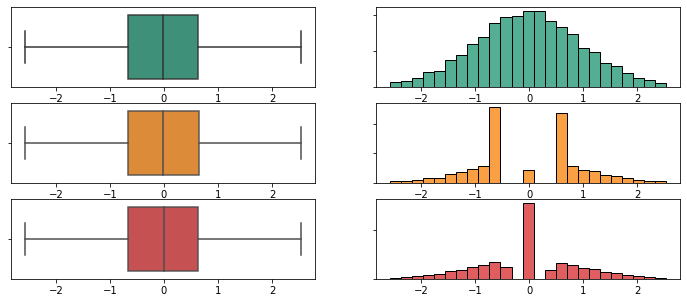

In [4]:
c_list = ['#1a936f', '#F77F05', '#D62829']

n = 25
f, axes = plt.subplots(3, 2 ,figsize=(12,5))
ax1=sns.boxplot(s1,ax= axes[0,0],color= c_list[0],boxprops= dict(alpha=.9))
ax2=sns.boxplot(s2,ax= axes[1,0],color= c_list[1],boxprops= dict(alpha=.9))
ax3=sns.boxplot(s3,ax= axes[2,0],color= c_list[2],boxprops= dict(alpha=.9))

ax4=sns.histplot(s1, bins=n, ax=axes[0,1], color=c_list[0])
ax5=sns.histplot(s2, bins=n, ax=axes[1,1], color=c_list[1])
ax6=sns.histplot(s3, bins=n, ax=axes[2,1], color=c_list[2])

ax4.set(ylabel=None, yticklabels=[])
ax5.set(ylabel=None, yticklabels=[])
ax6.set(ylabel=None, yticklabels=[])
plt.show()

In [5]:
bins1 = pd.cut(s1, bins=n, labels=False)
bins2 = pd.cut(s2, bins=n, labels=False)
bins3 = pd.cut(s3, bins=n, labels=False)

df1 = pd.DataFrame(zip(s1, bins1), columns=['v1','bins'])
df2 = pd.DataFrame(zip(s2, bins2), columns=['v2','bins'])
df3 = pd.DataFrame(zip(s3, bins3), columns=['v3','bins'])

df1_m = pd.melt(df1, id_vars=['bins'],value_vars=['v1'])
df2_m = pd.melt(df2, id_vars=['bins'],value_vars=['v2'])
df3_m = pd.melt(df3, id_vars=['bins'],value_vars=['v3'])

df = pd.concat([df1_m, df2_m, df3_m])
df.head()

,bins,variable,value
0,12,v1,0.042012
1,6,v1,-1.276512
2,10,v1,-0.408959
3,13,v1,0.205893
4,14,v1,0.470144
